_Eduardus Tjitrahardja | @edutjie | 2022_


# Import Libraries


In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display

# Read Dataset


In [112]:
data_file = open("dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()


### Inspect the data


In [113]:
len(data_list)


100

In [114]:
data_list[0]


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

- The first number is ‘5’ which is the label
- The rest of the 784 numbers are the colour values for the pixels that make up the image (value range from 0 to 255)


# Plot The Handwriting


**What we're going to do:**

- Split that long text string of comma separated values into individual values, using the commas as the place to do the splitting.
- Ignore the first value, which is the label, and take the remaining list of 28 \* 28 = 784 values and turn them into an array which has a shape of 28 rows by 28 columns.
- Plot that array!

> Note: **np.asfarray()** is a numpy function to convert the text strings into real numbers and to create an array of those numbers.


In [115]:
def plot_handwriting(data):
    splitted_data = data.split(",")
    image_array = np.asfarray(splitted_data[1:]).reshape((28, 28))
    plt.imshow(image_array, cmap="Greys", interpolation="None")


Let's try with index 0


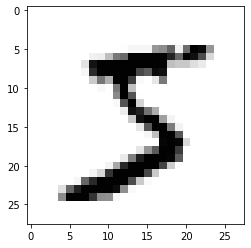

In [116]:
plot_handwriting(data_list[0])


# Pre Processing Input Data


In [117]:
def scale_data(data):
    splitted_data = data.split(",")
    return (np.asfarray(splitted_data[1:]) * 0.99 / 255) + 0.01


In [118]:
inputs = scale_data(data_list[0])
inputs


array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

# Constructs The Target Matrix


In [119]:
def generate_targets(data, output_nodes):
    splitted_data = data.split(",")
    targets = np.zeros(output_nodes) + 0.01
    targets[int(splitted_data[0])] = 0.99
    return targets


In [120]:
targets = generate_targets(data_list[0], output_nodes=10)
targets


array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

# Training Neural Network


In [121]:
from NeuralNetwork import NeuralNetwork


### Set nodes:

- Input nodes is 784 because that's how much is the inputs 28x28 = 784
- The choice of 100 hidden nodes is not so scientific. We didn’t choose a number larger than 784 because the idea is that neural networks should **find features or patterns in the input which can be expressed in a shorter form than the input itself. So by choosing a value smaller than the number of inputs, we force the network to try to summarise the key features.** However if we choose too few hidden layer nodes, then we restrict the ability of the network to find sufficient features or patterns. Given the output layer needs 10 labels, hence 10 output nodes, the choice of an intermediate 100 for the hidden layer seems to make sense.
- Output nodes is 10 because that's how much is the targets [0, 9]


In [122]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3



### Create NN Instance


In [123]:
nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


### Train the neural network

In [125]:
for data in data_list:
    inputs = scale_data(data)
    targets = generate_targets(data, output_nodes)
    nn.train(inputs_list=inputs, targets_list=targets)



# Testing the Network

### Load The Test Dataset

In [126]:
# load the mnist test data CSV file into a list 
test_data_file = open("dataset/mnist_test_10.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close() 

### Inspect The First Element of Test Dataset

In [127]:
first_test_data = test_data_list[0].split(",")
first_test_data[0]

'7'

As we can see the first element of the test dataset is labeled '7'. So, we're expecting out Neural Network to predict '7'

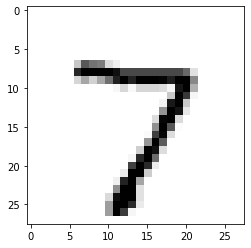

In [128]:
plot_handwriting(test_data_list[0])

In [129]:
nn.query(scale_data(test_data_list[0]))

array([[0.02569037],
       [0.00338795],
       [0.08076808],
       [0.01103004],
       [0.07583608],
       [0.13405596],
       [0.00809181],
       [0.90769822],
       [0.07955482],
       [0.02372514]])

We can see that the highest value of the query is at 7th index. **It works!**

In [131]:
np.argmax(nn.query(scale_data(test_data_list[0])))

7

# Score Our NN Model

In [132]:
def score_model(model, datas):
    scorecard = []

    for data in datas:
        # set expected_label
        expected_output = int(data.split(",")[0])

        # set inputs and targets
        inputs = scale_data(data)

        # predict
        outputs = model.query(inputs)

        # find the predicted label
        actual_output = np.argmax(outputs)

        print(
            f"Expected Output: '{expected_output}', Actual Output: '{actual_output}'"
        )

        if expected_output == actual_output:
            scorecard.append(1)
        else:
            scorecard.append(0)
            
    return np.mean(scorecard)


> note: **np.argmax()** is a numpy function that finds the largest value in an array and tells us its position

In [133]:
score_model(nn, test_data_list)

Expected Output: '7', Actual Output: '7'
Expected Output: '2', Actual Output: '2'
Expected Output: '1', Actual Output: '1'
Expected Output: '0', Actual Output: '0'
Expected Output: '4', Actual Output: '4'
Expected Output: '1', Actual Output: '1'
Expected Output: '4', Actual Output: '4'
Expected Output: '9', Actual Output: '4'
Expected Output: '5', Actual Output: '4'
Expected Output: '9', Actual Output: '7'


0.7

Not so bad! for the fact we only use 100 train dataset.